In [116]:
import pandas as pd
import glob
import os
import re

DATA_DIR = "data"  # change if needed

post_files = glob.glob(os.path.join(DATA_DIR, "*_posts_*.csv"))

post_dfs = []

for file in post_files:
    df = pd.read_csv(file)
    
    # Extract subreddit name
    # reddit_<subreddit>_1000_posts_...
    match = re.search(r"reddit_(.*?)_1000_posts", os.path.basename(file))
    subreddit = match.group(1) if match else "unknown"
    
    df["subreddit"] = subreddit
    post_dfs.append(df)

posts_df = pd.concat(post_dfs, ignore_index=True)

print(posts_df.shape)
posts_df


(1144, 8)


,post_id,title,body,created_utc,score,num_comments,url,subreddit
0,1qx2vvc,Information systems or business analytics?,"Hi, I am a first year information systems majo...",1.770338e+09,1,2,https://www.reddit.com/r/analytics/comments/1q...,analytics
1,1qx1m80,Most DA portfolios are ignored for one reason ...,Rule: if a hiring manager can't point to a job...,1.770335e+09,0,2,https://www.reddit.com/r/analytics/comments/1q...,analytics
2,1qwrtk9,Pivot to analytics feasible?,Hi all. \nI am an economics graduate. I have b...,1.770313e+09,0,3,https://www.reddit.com/r/analytics/comments/1q...,analytics
3,1qwq7lw,Looking for Retail Data Analysis Project Ideas...,"Hi everyone,\n\nI’m working on building a reta...",1.770310e+09,3,4,https://www.reddit.com/r/analytics/comments/1q...,analytics
4,1qwpoxu,MS in Business Analytics or MS in Data Analytics?,What is the better choice? I've heard an MSDS ...,1.770308e+09,1,3,https://www.reddit.com/r/analytics/comments/1q...,analytics
...,...,...,...,...,...,...,...,...
1139,1qbx8bd,There are several odd things in this analysis.,I found this in a serious research paper from ...,1.768325e+09,56,23,https://www.reddit.com/r/datascience/comments/...,datascience
1140,1qbtoyf,Looking for advice on switching domain/industry,"Hello everyone, I am currently a data scientis...",1.768317e+09,34,31,https://www.reddit.com/r/datascience/comments/...,datascience
1141,1qbhvqw,Nearly 450K Tech Job Posts But Still No Hires—...,NaN,1.768279e+09,245,43,https://www.reddit.com/r/datascience/comments/...,datascience
1142,1qb5g4v,Optimization of GBDT training complexity to O(...,We’ve spent the last few months working on **P...,1.768248e+09,7,5,https://www.reddit.com/r/datascience/comments/...,datascience


In [117]:
comment_files = glob.glob(os.path.join(DATA_DIR, "*_top_10_comments_*.csv"))

comment_dfs = []

for file in comment_files:
    df = pd.read_csv(file)
    
    # Extract subreddit name
    # reddit_<subreddit>_top_10_comments_...
    match = re.search(r"reddit_(.*?)_top_10_comments", os.path.basename(file))
    subreddit = match.group(1) if match else "unknown"
    
    df["subreddit"] = subreddit
    comment_dfs.append(df)

comments_df = pd.concat(comment_dfs, ignore_index=True)

print(comments_df.shape)
comments_df


(4769, 5)


,post_id,comment_rank,comment_body,comment_score,subreddit
0,1qx2vvc,1,If this post doesn't follow the rules or isn't...,1,analytics
1,1qx2vvc,2,I would double major if they are pretty close ...,1,analytics
2,1qx1m80,1,If this post doesn't follow the rules or isn't...,1,analytics
3,1qwrtk9,1,If this post doesn't follow the rules or isn't...,1,analytics
4,1qwrtk9,2,Yes the pivot is absolutely feasible and you a...,1,analytics
...,...,...,...,...,...
4764,1qalzjc,1,Hey everyone I'm a neuroscientist with 7 years...,2,datascience
4765,1qalzjc,2,There are a couple of opportunities we are loo...,1,datascience
4766,1qalzjc,3,Hi everyone! I’m a Geoscientist with a backgro...,1,datascience
4767,1qalzjc,4,"Hi all! I finished my PhD a few months ago, an...",1,datascience


In [118]:
# Check subreddits
posts_df["subreddit"].value_counts()
comments_df["subreddit"].value_counts()

# Check post_id consistency
posts_df["post_id"].nunique()
comments_df["post_id"].nunique()

# Check missing text
posts_df[["title", "body"]].isnull().mean()
comments_df["comment_body"].isnull().mean()


np.float64(0.0)

In [119]:
display(posts_df.columns.tolist())

display(comments_df.columns.tolist())

['post_id',
 'title',
 'body',
 'created_utc',
 'score',
 'num_comments',
 'url',
 'subreddit']

['post_id', 'comment_rank', 'comment_body', 'comment_score', 'subreddit']

In [120]:

#~ combining title and body into a single text column for posts

posts_df["title"] = posts_df["title"].fillna("")
posts_df["body"]  = posts_df["body"].fillna("")
posts_df["post_text"] = (posts_df["title"].str.strip() + " " + posts_df["body"].str.strip()).str.strip()



#~ cleaning missing in comments_df

comments_df["comment_body"] = comments_df["comment_body"].fillna("")

In [121]:

#~ keeping top 5 comments per post

TOP_K = 5

comments_topk = (
    comments_df
    .sort_values(["post_id", "comment_rank"])
    .query("comment_rank <= @TOP_K")
)


comments_agg = (
    comments_topk
    .groupby("post_id", as_index=False)
    .agg(
        comment_text=("comment_body", lambda x: " ".join(x.astype(str))),
        comment_score_sum=("comment_score", "sum"),
        comment_score_mean=("comment_score", "mean"),
        n_comments_used=("comment_body", "count"),
    )
)



#~ merge post_id level 

analysis_df = posts_df.merge(
    comments_agg,
    on="post_id",
    how="left"
)

# Fill posts with no comments captured
analysis_df["comment_text"] = analysis_df["comment_text"].fillna("")
analysis_df["comment_score_sum"] = analysis_df["comment_score_sum"].fillna(0)
analysis_df["comment_score_mean"] = analysis_df["comment_score_mean"].fillna(0)
analysis_df["n_comments_used"] = analysis_df["n_comments_used"].fillna(0).astype(int)


In [122]:
print("Posts:", posts_df.shape)
print("Comments:", comments_df.shape)
print("Analysis:", analysis_df.shape)

# Check subreddit consistency
mismatch = (analysis_df["subreddit"].isna().mean())
print("Missing subreddit rate:", mismatch)

# Posts where you didn't capture any comments (could still have num_comments > 0 on Reddit)
analysis_df["no_comments_captured"] = analysis_df["comment_text"].eq("")
analysis_df["no_comments_captured"].mean()


Posts: (1144, 9)
Comments: (4769, 5)
Analysis: (1144, 13)
Missing subreddit rate: 0.0


np.float64(0.09178321678321678)

## Single Expected Outcome and Study Focus

This notebook focuses on one primary expected outcome:

**Community comments shift the discussion from hard-skill emphasis toward more soft-skill/advice-oriented language.**

How this is measured:
- Build weighted hard/soft skill lexicons using PMI.
- Score each post and its associated top comments.
- Compute `skill_shift = comment_skill_balance - post_skill_balance`.
- Test whether average `skill_shift` is significantly positive.


In [123]:
HARD_SKILL_SEEDS = [
    "sql", "python", "r", "excel", "tableau", "power bi",
    "cloud", "aws", "spark", "pandas", "numpy",
    "statistics", "machine learning", "model",
    "pipeline", "database", "etl"
]

SOFT_SKILL_SEEDS = [
    "communication", "storytelling", "business",
    "stakeholder", "presentation", "collaboration",
    "teamwork", "mindset", "problem solving",
    "critical thinking", "curiosity", "adaptability"
]

In [124]:

#~ normalize seed phrases

HARD_SEEDS = {s.lower().strip().replace(" ", "_") for s in HARD_SKILL_SEEDS}
SOFT_SEEDS = {s.lower().strip().replace(" ", "_") for s in SOFT_SKILL_SEEDS}

ALL_SEEDS = HARD_SEEDS | SOFT_SEEDS
HARD_SEEDS, SOFT_SEEDS

({'aws',
  'cloud',
  'database',
  'etl',
  'excel',
  'machine_learning',
  'model',
  'numpy',
  'pandas',
  'pipeline',
  'power_bi',
  'python',
  'r',
  'spark',
  'sql',
  'statistics',
  'tableau'},
 {'adaptability',
  'business',
  'collaboration',
  'communication',
  'critical_thinking',
  'curiosity',
  'mindset',
  'presentation',
  'problem_solving',
  'stakeholder',
  'storytelling',
  'teamwork'})

In [125]:
import re
import nltk

from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer

# one-time downloads (safe to re-run)
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\calvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\calvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\calvi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\calvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\calvi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [126]:
STOP = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
KEEP_PREFIXES = ("NN", "JJ", "VB")


In [127]:
def clean_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text


In [128]:
def lemmatize_word(word: str, tag: str) -> str:
    if tag.startswith("VB"):
        return lemmatizer.lemmatize(word, "v")
    if tag.startswith("JJ"):
        return lemmatizer.lemmatize(word, "a")
    return lemmatizer.lemmatize(word, "n")


In [129]:
def tokenize_with_bigrams(text: str) -> list[str]:
    if not isinstance(text, str) or not text.strip():
        return []

    text = clean_text(text)
    words = word_tokenize(text)

    # remove stopwords & very short tokens
    words = [w for w in words if w not in STOP and len(w) > 1]

    tagged = pos_tag(words)

    kept = []
    for w, t in tagged:
        if not t.startswith(KEEP_PREFIXES):
            continue
        lemma = lemmatize_word(w, t)
        if lemma and lemma not in STOP and len(lemma) > 1:
            kept.append(lemma)

    # build bigrams
    bigrams = [f"{kept[i]}_{kept[i+1]}" for i in range(len(kept) - 1)]

    return kept + bigrams


In [130]:
sample_text = analysis_df.loc[0, "post_text"]
tokenize_with_bigrams(sample_text)


['information',
 'system',
 'business',
 'analytics',
 'hi',
 'first',
 'year',
 'information',
 'system',
 'major',
 'interest',
 'business',
 'technology',
 'analytics',
 'data',
 'engineering',
 'look',
 'business',
 'analytics',
 'degree',
 'map',
 'notice',
 'infosys',
 'busan',
 'required',
 'class',
 'wonder',
 'smarter',
 'major',
 'business',
 'analytics',
 'advice',
 'information_system',
 'system_business',
 'business_analytics',
 'analytics_hi',
 'hi_first',
 'first_year',
 'year_information',
 'information_system',
 'system_major',
 'major_interest',
 'interest_business',
 'business_technology',
 'technology_analytics',
 'analytics_data',
 'data_engineering',
 'engineering_look',
 'look_business',
 'business_analytics',
 'analytics_degree',
 'degree_map',
 'map_notice',
 'notice_infosys',
 'infosys_busan',
 'busan_required',
 'required_class',
 'class_wonder',
 'wonder_smarter',
 'smarter_major',
 'major_business',
 'business_analytics',
 'analytics_advice']

In [131]:
analysis_df["post_tokens"] = analysis_df["post_text"].apply(tokenize_with_bigrams)
analysis_df["comment_tokens"] = analysis_df["comment_text"].apply(tokenize_with_bigrams)


In [132]:
from collections import Counter

print("Empty post token rate:",
      (analysis_df["post_tokens"].str.len() == 0).mean())

print("Empty comment token rate:",
      (analysis_df["comment_tokens"].str.len() == 0).mean())

Counter(t for toks in analysis_df["post_tokens"] for t in toks).most_common(15)


Empty post token rate: 0.0
Empty comment token rate: 0.09265734265734266


[('data', 2489),
 ('work', 824),
 ('use', 772),
 ('get', 584),
 ('job', 481),
 ('project', 464),
 ('analytics', 454),
 ('want', 410),
 ('time', 409),
 ('look', 398),
 ('sql', 385),
 ('tool', 366),
 ('need', 356),
 ('make', 345),
 ('year', 341)]

In [133]:
def tokenize_with_bigrams_seeded(text: str) -> list[str]:
    toks = tokenize_with_bigrams(text)  # your existing function output: unigrams+bigrams
    # Keep all unigrams; keep only bigrams that are in seed list
    filtered = []
    for t in toks:
        if "_" in t:
            if t in ALL_SEEDS:
                filtered.append(t)
        else:
            filtered.append(t)
    return filtered

analysis_df["post_tokens"] = analysis_df["post_text"].apply(tokenize_with_bigrams_seeded)
analysis_df["comment_tokens"] = analysis_df["comment_text"].apply(tokenize_with_bigrams_seeded)


In [134]:
def has_any_seed(tokens, seed_set):
    tset = set(tokens)
    return any(s in tset for s in seed_set)

analysis_df["is_hard_doc"] = analysis_df["post_tokens"].apply(lambda x: has_any_seed(x, HARD_SEEDS))
analysis_df["is_soft_doc"] = analysis_df["post_tokens"].apply(lambda x: has_any_seed(x, SOFT_SEEDS))

analysis_df[["is_hard_doc", "is_soft_doc"]].mean()


is_hard_doc    0.491259
is_soft_doc    0.149476
dtype: float64

In [135]:
analysis_df["has_hard"] = analysis_df["post_tokens"].apply(lambda x: has_any_seed(x, HARD_SEEDS))
analysis_df["has_soft"] = analysis_df["post_tokens"].apply(lambda x: has_any_seed(x, SOFT_SEEDS))

hard_only = analysis_df[analysis_df["has_hard"] & ~analysis_df["has_soft"]]
soft_only = analysis_df[analysis_df["has_soft"] & ~analysis_df["has_hard"]]

print("hard_only posts:", hard_only.shape[0])
print("soft_only posts:", soft_only.shape[0])
print("overlap posts:", (analysis_df["has_hard"] & analysis_df["has_soft"]).sum())


hard_only posts: 464
soft_only posts: 73
overlap posts: 98


In [136]:
from collections import Counter
import math

hard_tokens = [t for toks in hard_only["post_tokens"] for t in toks]
soft_tokens = [t for toks in soft_only["post_tokens"] for t in toks]
all_tokens  = [t for toks in analysis_df["post_tokens"] for t in toks]

hard_counts = Counter(hard_tokens)
soft_counts = Counter(soft_tokens)
all_counts  = Counter(all_tokens)

H = sum(hard_counts.values())
S = sum(soft_counts.values())
A = sum(all_counts.values())
V = len(all_counts)
alpha = 1.0

def pmi(count_wc, total_c, count_w, total_all):
    pwc = (count_wc + alpha) / (total_c + alpha * V)
    pw  = (count_w  + alpha) / (total_all + alpha * V)
    return math.log(pwc / pw)

pmi_hard = {w: pmi(hard_counts[w], H, all_counts[w], A) for w in all_counts}
pmi_soft = {w: pmi(soft_counts[w], S, all_counts[w], A) for w in all_counts}

MIN_FREQ = 10
vocab = {w for w, c in all_counts.items() if c >= MIN_FREQ}

pmi_hard_f = {w: pmi_hard[w] for w in vocab}
pmi_soft_f = {w: pmi_soft[w] for w in vocab}

print("Top HARD PMI terms:")
print(sorted(pmi_hard_f.items(), key=lambda x: x[1], reverse=True)[:20])

print("\nTop SOFT PMI terms:")
print(sorted(pmi_soft_f.items(), key=lambda x: x[1], reverse=True)[:20])


Top HARD PMI terms:
[('floor', 0.5755413503737679), ('mysql', 0.5755413503737679), ('scala', 0.5755413503737679), ('ngn', 0.5755413503737679), ('tenant', 0.5755413503737679), ('cast', 0.5755413503737679), ('pool', 0.5755413503737679), ('flink', 0.5755413503737679), ('rent', 0.5755413503737679), ('hdd', 0.5755413503737679), ('stag', 0.5755413503737679), ('transformer', 0.5755413503737677), ('command', 0.5755413503737677), ('endpoint', 0.5755413503737677), ('raid', 0.5755413503737677), ('numpy', 0.5755413503737677), ('near', 0.5755413503737677), ('perpetual', 0.5755413503737677), ('hg', 0.5755413503737677), ('listing', 0.5755413503737677)]

Top SOFT PMI terms:
[('apprenticeship', 1.4594577674084726), ('btsa', 1.1717756949566918), ('foundation', 1.1717756949566918), ('ups', 1.1565082228259032), ('prompt', 1.1182870100057054), ('ok', 1.0976677228029696), ('business', 1.0871964229356745), ('uk', 1.0576623881892706), ('meeting', 1.0005039743493218), ('campus', 0.9798846871465864), ('one', 0.

In [137]:
# Restrict PMI reporting strictly to each seed group
pmi_hard_seed = {w: pmi_hard[w] for w in HARD_SEEDS if w in pmi_hard}
pmi_soft_seed = {w: pmi_soft[w] for w in SOFT_SEEDS if w in pmi_soft}


In [138]:
print("Hard seed PMI:")
print(sorted(pmi_hard_seed.items(), key=lambda x: x[1], reverse=True))

print("\nSoft seed PMI:")
print(sorted(pmi_soft_seed.items(), key=lambda x: x[1], reverse=True))


Hard seed PMI:
[('statistics', 0.5755413503737679), ('machine_learning', 0.5755413503737679), ('numpy', 0.5755413503737677), ('spark', 0.5355360157600686), ('aws', 0.515643208792699), ('cloud', 0.5077187540350067), ('pandas', 0.49549864270023136), ('database', 0.44548822212556993), ('etl', 0.4213906705465095), ('pipeline', 0.36747690588667836), ('model', 0.3025949765757398), ('python', 0.28255422569229377), ('sql', 0.25449358407818645), ('tableau', 0.18349926259774424), ('excel', 0.14475843428131335), ('power_bi', -0.015823135876235343)]

Soft seed PMI:
[('teamwork', 1.9449655831901735), ('mindset', 1.6084933465689604), ('collaboration', 1.4341399594241826), ('curiosity', 1.2518184026302281), ('presentation', 1.0976677228029696), ('business', 1.0871964229356745), ('communication', 0.7409927788642373), ('stakeholder', 0.6539814018746075), ('critical_thinking', 0.3355276707560729), ('storytelling', -0.2522589941460461)]


In [139]:
# Build final weighted lexicons ONLY over seeds
pmi_hard_seed_final = {w: pmi_hard.get(w, 0.0) for w in HARD_SEEDS}
pmi_soft_seed_final = {w: pmi_soft.get(w, 0.0) for w in SOFT_SEEDS}

print("Hard seeds with nonzero PMI:", sum(v != 0.0 for v in pmi_hard_seed_final.values()), "/", len(pmi_hard_seed_final))
print("Soft seeds with nonzero PMI:", sum(v != 0.0 for v in pmi_soft_seed_final.values()), "/", len(pmi_soft_seed_final))


Hard seeds with nonzero PMI: 16 / 17
Soft seeds with nonzero PMI: 10 / 12


In [140]:
def score_seed_lexicon(tokens, lexicon):
    return sum(lexicon.get(t, 0.0) for t in tokens)

analysis_df["hard_post_score"] = analysis_df["post_tokens"].apply(lambda x: score_seed_lexicon(x, pmi_hard_seed_final))
analysis_df["soft_post_score"] = analysis_df["post_tokens"].apply(lambda x: score_seed_lexicon(x, pmi_soft_seed_final))

analysis_df["hard_comment_score"] = analysis_df["comment_tokens"].apply(lambda x: score_seed_lexicon(x, pmi_hard_seed_final))
analysis_df["soft_comment_score"] = analysis_df["comment_tokens"].apply(lambda x: score_seed_lexicon(x, pmi_soft_seed_final))


In [141]:
analysis_df["post_skill_balance"] = analysis_df["soft_post_score"] - analysis_df["hard_post_score"]
analysis_df["comment_skill_balance"] = analysis_df["soft_comment_score"] - analysis_df["hard_comment_score"]
analysis_df["skill_shift"] = analysis_df["comment_skill_balance"] - analysis_df["post_skill_balance"]

analysis_df[["post_skill_balance", "comment_skill_balance", "skill_shift"]].describe()


,post_skill_balance,comment_skill_balance,skill_shift
count,1144.000000,1144.000000,1144.000000
mean,-0.282756,-0.176402,0.106353
std,1.198965,1.409578,1.500076
min,-7.674939,-14.660397,-10.165643
25%,-0.650031,-0.427313,-0.367477
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.709090
max,7.305505,8.971803,8.421654


In [142]:
analysis_df["hard_seed_hits_post"] = analysis_df["post_tokens"].apply(lambda x: sum(t in HARD_SEEDS for t in x))
analysis_df["soft_seed_hits_post"] = analysis_df["post_tokens"].apply(lambda x: sum(t in SOFT_SEEDS for t in x))

analysis_df["hard_seed_hits_comment"] = analysis_df["comment_tokens"].apply(lambda x: sum(t in HARD_SEEDS for t in x))
analysis_df["soft_seed_hits_comment"] = analysis_df["comment_tokens"].apply(lambda x: sum(t in SOFT_SEEDS for t in x))

analysis_df[[
    "hard_seed_hits_post","soft_seed_hits_post",
    "hard_seed_hits_comment","soft_seed_hits_comment"
]].describe()


,hard_seed_hits_post,soft_seed_hits_post,hard_seed_hits_comment,soft_seed_hits_comment
count,1144.000000,1144.000000,1144.000000,1144.000000
mean,1.705420,0.263112,1.756119,0.412587
std,2.934354,0.800155,3.563320,1.083261
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,29.000000,8.000000,53.000000,10.000000


In [143]:
print("Nonzero hard_post_score rate:", (analysis_df["hard_post_score"] != 0).mean())
print("Nonzero soft_post_score rate:", (analysis_df["soft_post_score"] != 0).mean())
print("Nonzero hard_comment_score rate:", (analysis_df["hard_comment_score"] != 0).mean())
print("Nonzero soft_comment_score rate:", (analysis_df["soft_comment_score"] != 0).mean())


Nonzero hard_post_score rate: 0.49125874125874125
Nonzero soft_post_score rate: 0.14947552447552448
Nonzero hard_comment_score rate: 0.42132867132867136
Nonzero soft_comment_score rate: 0.20279720279720279


## Final Inference: Is Comment Language More Soft-Skill Oriented?

Primary test target:
- `skill_shift = comment_skill_balance - post_skill_balance`

Interpretation:
- Positive mean `skill_shift` supports the expected outcome.


In [144]:
import numpy as np
from scipy import stats

# Paired difference per thread
shift = (analysis_df["comment_skill_balance"] - analysis_df["post_skill_balance"]).dropna()

n = shift.shape[0]
mean_shift = shift.mean()
median_shift = shift.median()
std_shift = shift.std(ddof=1)
positive_rate = (shift > 0).mean()

# Effect size for paired samples (Cohen's dz)
cohens_dz = mean_shift / std_shift if std_shift > 0 else np.nan

# One-sample t-test on paired differences against 0
# (two-sided p from scipy, converted to one-sided for mean_shift > 0)
t_stat, p_two_sided = stats.ttest_1samp(shift, popmean=0.0, nan_policy="omit")
if mean_shift >= 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - (p_two_sided / 2)

# Non-parametric paired check
try:
    w_stat, p_wilcoxon = stats.wilcoxon(shift)
except ValueError:
    w_stat, p_wilcoxon = np.nan, np.nan

print(f"n = {n}")
print(f"mean skill_shift = {mean_shift:.4f}")
print(f"median skill_shift = {median_shift:.4f}")
print(f"share(skill_shift > 0) = {positive_rate:.3f}")
print(f"Cohen's dz = {cohens_dz:.3f}")
print(f"t-stat = {t_stat:.3f}, one-sided p (shift > 0) = {p_one_sided:.6g}")
print(f"Wilcoxon stat = {w_stat}, two-sided p = {p_wilcoxon}")

if p_one_sided < 0.05 and mean_shift > 0:
    print("Inference: evidence supports a positive shift toward softer/advice-oriented comment language.")
else:
    print("Inference: no strong statistical evidence of a positive shift.")


n = 1144
mean skill_shift = 0.1064
median skill_shift = 0.0000
share(skill_shift > 0) = 0.410
Cohen's dz = 0.071
t-stat = 2.398, one-sided p (shift > 0) = 0.00832209
Wilcoxon stat = 142058.5, two-sided p = 0.0008739048793264172
Inference: evidence supports a positive shift toward softer/advice-oriented comment language.


## Visualization: Skill Shift Distribution


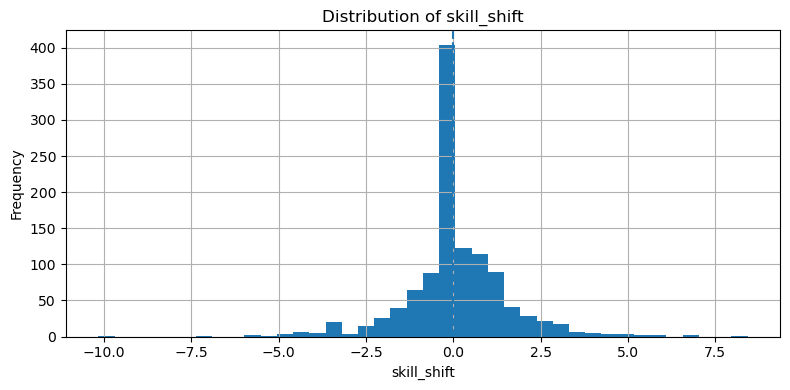

C:\Users\calvi\AppData\Local\Temp\ipykernel_20976\2221967785.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([analysis_df["post_skill_balance"].dropna(), analysis_df["comment_skill_balance"].dropna()], labels=["Post", "Comment"])


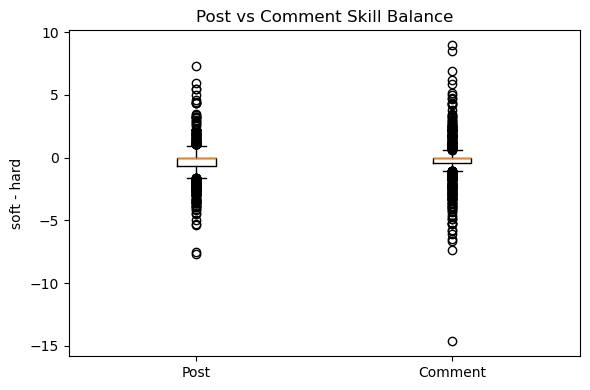

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
analysis_df["skill_shift"].hist(bins=40)
plt.axvline(0, linestyle="--")
plt.title("Distribution of skill_shift")
plt.xlabel("skill_shift")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.boxplot([analysis_df["post_skill_balance"].dropna(), analysis_df["comment_skill_balance"].dropna()], labels=["Post", "Comment"])
plt.title("Post vs Comment Skill Balance")
plt.ylabel("soft - hard")
plt.tight_layout()
plt.show()


## Main Outcome Summary (Hard vs Soft Shift)

This section contains the direct statistical output for the primary outcome:
- Mean and median `skill_shift`
- Effect size (`Cohen's dz`)
- One-sample t-test and Wilcoxon test
- Share of posts with positive shift

Research question linkage:
- Difference between post framing and comment framing is quantified through `skill_shift`.


## Word Association Analysis (Lift and Confidence)

This section adds lift/confidence association analysis on post-level tokens.
- `lift(A,B) = P(A,B)/(P(A)P(B))`
- `confidence(B|A) = P(A,B)/P(A)`


In [146]:
import pandas as pd

post_token_sets = analysis_df["post_tokens"].apply(lambda x: set(x) if isinstance(x, list) else set())

def assoc_stats(a, b, docs):
    a_n = sum(a in d for d in docs)
    b_n = sum(b in d for d in docs)
    ab_n = sum((a in d) and (b in d) for d in docs)
    lift = (ab_n * len(docs) / (a_n * b_n)) if (a_n > 0 and b_n > 0) else float('nan')
    conf_b_given_a = (ab_n / a_n) if a_n > 0 else float('nan')
    conf_a_given_b = (ab_n / b_n) if b_n > 0 else float('nan')
    return a_n, b_n, ab_n, lift, conf_b_given_a, conf_a_given_b

pairs = [
    ("python", "sql"),
    ("python", "machine_learning"),
    ("sql", "excel"),
    ("communication", "stakeholder"),
    ("teamwork", "collaboration"),
    ("job", "analytics"),
]

rows = []
for a, b in pairs:
    a_n, b_n, ab_n, lift, conf_b_given_a, conf_a_given_b = assoc_stats(a, b, post_token_sets)
    rows.append({"A":a,"B":b,"count_A":a_n,"count_B":b_n,"count_A_and_B":ab_n,"lift_A_B":lift,"conf_B_given_A":conf_b_given_a,"conf_A_given_B":conf_a_given_b})

assoc_df = pd.DataFrame(rows).sort_values("lift_A_B", ascending=False)
print("Lift/Confidence table:")
print(assoc_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


Lift/Confidence table:
            A                B  count_A  count_B  count_A_and_B  lift_A_B  conf_B_given_A  conf_A_given_B
communication      stakeholder        6       29              2   13.1494          0.3333          0.0690
       python              sql      173      219            103    3.1101          0.5954          0.4703
          sql            excel      219       68             39    2.9960          0.1781          0.5735
       python machine_learning      173        3              1    2.2042          0.0058          0.3333
          job        analytics      258      237             60    1.1226          0.2326          0.2532
     teamwork    collaboration        1        4              0    0.0000          0.0000          0.0000


## Topic Patterns and Engagement Modeling

The next two sections extend the analysis in two ways:
- Topic modeling to identify recurring discussion themes.
- Predictive modeling to estimate which posts are likely to receive high engagement.

Together, this helps move from descriptive findings to pattern discovery and practical prediction.


In [147]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

RANDOM_STATE = 42

# Use tokenized post text for topic modeling
analysis_df["post_text_for_topics"] = analysis_df["post_tokens"].apply(lambda toks: " ".join(toks) if isinstance(toks, list) else "")

vectorizer = CountVectorizer(
    min_df=10,
    max_df=0.8,
)
X_topics = vectorizer.fit_transform(analysis_df["post_text_for_topics"])

# Small model selection sweep
candidate_topics = [4, 5, 6, 7, 8]
best_model = None
best_k = None
best_perplexity = np.inf

for k in candidate_topics:
    lda = LatentDirichletAllocation(
        n_components=k,
        random_state=RANDOM_STATE,
        learning_method="batch",
        max_iter=20,
    )
    lda.fit(X_topics)
    perp = lda.perplexity(X_topics)
    if perp < best_perplexity:
        best_perplexity = perp
        best_model = lda
        best_k = k

print(f"Selected number of topics: {best_k} (perplexity={best_perplexity:.2f})")

lda = best_model
topic_dist = lda.transform(X_topics)
analysis_df["topic_id"] = topic_dist.argmax(axis=1)

# Top words per topic
feature_names = np.array(vectorizer.get_feature_names_out())
TOP_N_WORDS = 10
for tid, comp in enumerate(lda.components_):
    top_words = feature_names[np.argsort(comp)[::-1][:TOP_N_WORDS]]
    print(f"Topic {tid}: {', '.join(top_words)}")

# Topic vs skill shift summary
topic_summary = (
    analysis_df.groupby("topic_id", as_index=False)
    .agg(
        n_posts=("post_id", "count"),
        mean_skill_shift=("skill_shift", "mean"),
        median_skill_shift=("skill_shift", "median"),
        mean_num_comments=("num_comments", "mean"),
    )
    .sort_values("mean_skill_shift", ascending=False)
)
print("\nTopic-level summary (sorted by mean skill_shift):")
print(topic_summary)



Selected number of topics: 4 (perplexity=594.56)
Topic 0: data, use, run, http, com, table, github, pipeline, python, gb
Topic 1: data, use, team, tool, work, sql, bi, build, need, design
Topic 2: data, file, project, table, use, build, analysis, make, clean, model
Topic 3: data, work, job, get, analytics, role, analyst, year, learn, company

Topic-level summary (sorted by mean skill_shift):
   topic_id  n_posts  mean_skill_shift  median_skill_shift  mean_num_comments
0         0      208          0.498962            0.267943           7.615385
3         3      535          0.026963            0.000000          15.497196
1         1      207          0.019005            0.000000          11.314010
2         2      194         -0.002451            0.000000           9.283505


## Visualization: Topic-Level Patterns


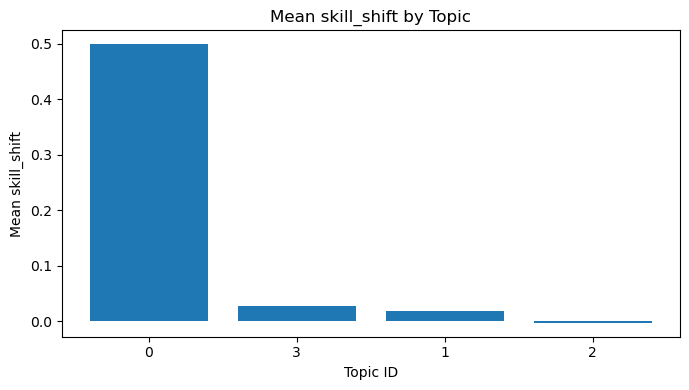

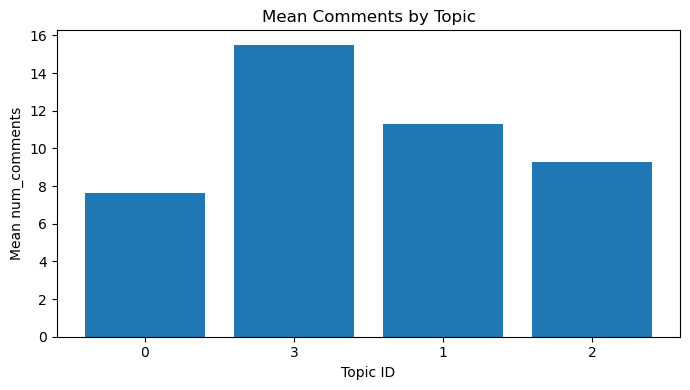

In [148]:
import matplotlib.pyplot as plt

if "topic_summary" not in globals():
    raise RuntimeError("Run topic modeling cell first.")

plot_df = topic_summary.sort_values("mean_skill_shift", ascending=False)

plt.figure(figsize=(7, 4))
plt.bar(plot_df["topic_id"].astype(str), plot_df["mean_skill_shift"])
plt.title("Mean skill_shift by Topic")
plt.xlabel("Topic ID")
plt.ylabel("Mean skill_shift")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(plot_df["topic_id"].astype(str), plot_df["mean_num_comments"])
plt.title("Mean Comments by Topic")
plt.xlabel("Topic ID")
plt.ylabel("Mean num_comments")
plt.tight_layout()
plt.show()


## Topic Results Summary

This section presents three topic outputs:
1. Top words per topic
2. Topic-level mean/median `skill_shift`
3. Topic-level comparison table across themes

These outputs quantify whether language-shift behavior differs across discussion themes.


## Topic Evidence: Representative Posts

Shows top 3 high-probability post examples per topic for transparent topic labeling.


In [149]:
import pandas as pd

if "topic_dist" not in globals():
    raise RuntimeError("Run topic modeling cell first.")

analysis_df["topic_max_prob"] = topic_dist.max(axis=1)
rows=[]
for tid in sorted(analysis_df["topic_id"].dropna().unique()):
    sub=analysis_df[analysis_df["topic_id"]==tid].sort_values("topic_max_prob", ascending=False).head(3)
    rows.append(sub[["topic_id","topic_max_prob","subreddit","num_comments","title"]])

topic_examples = pd.concat(rows, ignore_index=True)
print(topic_examples.to_string(index=False))


 topic_id  topic_max_prob       subreddit  num_comments                                                                                                                     title
        0        0.998498 dataengineering            20                                                         Benchmarking DuckDB vs BigQuery vs Athena on 20GB of Parquet data
        0        0.996734 dataengineering             1                                                                                            Couchbase Users / Config Setup
        0        0.996721 dataengineering             3                                               dc-input: turn any dataclass schema into a robust interactive input session
        1        0.996494    dataanalysis             1 Looking for feedback on a self-deployed web interface for exploring BigQuery data by asking questions in natural language
        1        0.996494 dataengineering             4 Looking for feedback on a self-deployed web interface 

In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

threshold = analysis_df["num_comments"].quantile(0.75)
analysis_df["high_engagement"] = (analysis_df["num_comments"] >= threshold).astype(int)
print(f"High-engagement threshold (75th pct): {threshold:.2f}")
print(analysis_df["high_engagement"].value_counts(normalize=True))

analysis_df["post_len_tokens"] = analysis_df["post_tokens"].apply(lambda x: len(x) if isinstance(x, list) else 0)
topic_prob_cols = [c for c in analysis_df.columns if c.startswith("topic_prob_")]
if not topic_prob_cols and "topic_dist" in globals():
    for i in range(topic_dist.shape[1]):
        analysis_df[f"topic_prob_{i}"] = topic_dist[:, i]
    topic_prob_cols = [c for c in analysis_df.columns if c.startswith("topic_prob_")]

struct_num = [
    "hard_post_score", "soft_post_score", "post_skill_balance",
    "hard_seed_hits_post", "soft_seed_hits_post", "post_len_tokens"
] + topic_prob_cols
struct_cat = ["subreddit"]

y_all = analysis_df["high_engagement"]
idx_train_post, idx_test_post = train_test_split(
    analysis_df.index, test_size=0.25, random_state=42, stratify=y_all
)
X_struct = analysis_df[struct_num + struct_cat]
X_train_struct = X_struct.loc[idx_train_post]
X_test_struct = X_struct.loc[idx_test_post]
y_train_post = y_all.loc[idx_train_post]
y_test_post = y_all.loc[idx_test_post]

pre = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), struct_num),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ]), struct_cat),
])

models = {
    "structured_logreg": (
        LogisticRegression(max_iter=500, class_weight="balanced"),
        {"model__C": [0.1, 1.0, 5.0, 10.0], "model__penalty": ["l2"]}
    ),
    "structured_rf": (
        RandomForestClassifier(random_state=42, class_weight="balanced"),
        {"model__n_estimators": [200, 400], "model__max_depth": [None, 8, 16], "model__min_samples_split": [2, 10]}
    ),
}

rows = []
structured_best = {}
for name, (mdl, grid) in models.items():
    pipe = Pipeline([("preprocess", pre), ("model", mdl)])
    gs = GridSearchCV(pipe, param_grid=grid, scoring="f1", cv=5, n_jobs=-1, refit=True)
    gs.fit(X_train_struct, y_train_post)
    structured_best[name] = gs
    pred = gs.best_estimator_.predict(X_test_struct)
    prob = gs.best_estimator_.predict_proba(X_test_struct)[:, 1]
    rows.append({
        "model_name": name,
        "cv_f1": gs.best_score_,
        "test_f1": f1_score(y_test_post, pred),
        "test_precision": precision_score(y_test_post, pred),
        "test_recall": recall_score(y_test_post, pred),
        "test_roc_auc": roc_auc_score(y_test_post, prob),
    })

X_train_text = analysis_df.loc[idx_train_post, "post_text"].fillna("")
X_test_text = analysis_df.loc[idx_test_post, "post_text"].fillna("")

tfidf_pipe = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced")),
])
tfidf_grid = {
    "tfidf__min_df": [3, 5, 10],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "model__C": [0.5, 1.0, 2.0],
}
tfidf_gs = GridSearchCV(tfidf_pipe, param_grid=tfidf_grid, scoring="f1", cv=5, n_jobs=-1, refit=True)
tfidf_gs.fit(X_train_text, y_train_post)
pred_t = tfidf_gs.best_estimator_.predict(X_test_text)
prob_t = tfidf_gs.best_estimator_.predict_proba(X_test_text)[:, 1]
rows.append({
    "model_name": "tfidf_logreg",
    "cv_f1": tfidf_gs.best_score_,
    "test_f1": f1_score(y_test_post, pred_t),
    "test_precision": precision_score(y_test_post, pred_t),
    "test_recall": recall_score(y_test_post, pred_t),
    "test_roc_auc": roc_auc_score(y_test_post, prob_t),
})

model_compare_df = pd.DataFrame(rows).sort_values(["test_f1", "test_roc_auc"], ascending=False)
print("Model comparison (post-time features only):")
print(model_compare_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

best_model_post_name = model_compare_df.iloc[0]["model_name"]
if best_model_post_name == "tfidf_logreg":
    best_model_post = tfidf_gs.best_estimator_
    X_test_post = X_test_text
    y_pred_post = pred_t
    y_prob_post = prob_t
else:
    best_model_post = structured_best[best_model_post_name].best_estimator_
    X_test_post = X_test_struct
    y_pred_post = best_model_post.predict(X_test_struct)
    y_prob_post = best_model_post.predict_proba(X_test_struct)[:, 1]

print(f"\nSelected downstream model: {best_model_post_name}")
print(classification_report(y_test_post, y_pred_post, digits=4))
print(confusion_matrix(y_test_post, y_pred_post))
print(f"ROC-AUC: {roc_auc_score(y_test_post, y_prob_post):.4f}")

post_model_artifacts = {
    "best_model": best_model_post,
    "best_model_name": best_model_post_name,
    "idx_test": idx_test_post,
    "y_test": y_test_post,
    "X_test": X_test_post,
    "y_pred": y_pred_post,
    "y_prob": y_prob_post,
}


High-engagement threshold (75th pct): 13.00
high_engagement
0    0.744755
1    0.255245
Name: proportion, dtype: float64
Model comparison (post-time features only):
       model_name  cv_f1  test_f1  test_precision  test_recall  test_roc_auc
structured_logreg 0.4695   0.5155          0.4132       0.6849        0.7337
     tfidf_logreg 0.4538   0.4944          0.4190       0.6027        0.6820
    structured_rf 0.3900   0.4767          0.4141       0.5616        0.7294

Selected downstream model: structured_logreg
              precision    recall  f1-score   support

           0     0.8606    0.6667    0.7513       213
           1     0.4132    0.6849    0.5155        73

    accuracy                         0.6713       286
   macro avg     0.6369    0.6758    0.6334       286
weighted avg     0.7464    0.6713    0.6911       286

[[142  71]
 [ 23  50]]
ROC-AUC: 0.7337


## Visualization: Model Comparison and Confusion Matrix


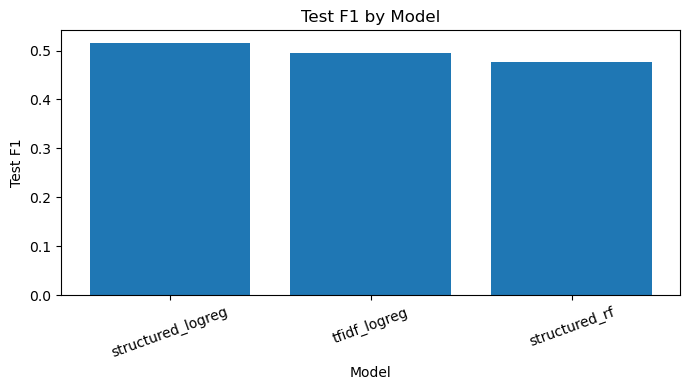

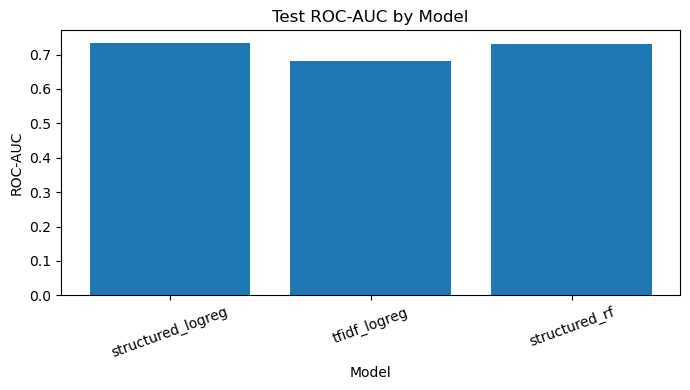

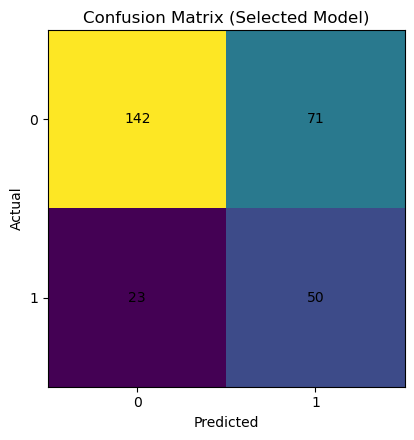

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

if "model_compare_df" not in globals() or "post_model_artifacts" not in globals():
    raise RuntimeError("Run engagement modeling cell first.")

cmp = model_compare_df.copy()

plt.figure(figsize=(7, 4))
plt.bar(cmp["model_name"], cmp["test_f1"])
plt.title("Test F1 by Model")
plt.xlabel("Model")
plt.ylabel("Test F1")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(cmp["model_name"], cmp["test_roc_auc"])
plt.title("Test ROC-AUC by Model")
plt.xlabel("Model")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

y_true = post_model_artifacts["y_test"]
y_pred = post_model_artifacts["y_pred"]
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4.5, 4.5))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Selected Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0,1], [0,1])
plt.yticks([0,1], [0,1])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')
plt.tight_layout()
plt.show()


## Subreddit-Level Comparison

This section reports subgroup differences by subreddit using class-consistent summaries:
- Mean and median `skill_shift` by subreddit
- High-engagement rate by subreddit
- Chi-square test for `high_engagement` distribution across subreddits


In [152]:
import pandas as pd
from scipy import stats

# Descriptive comparison of skill shift by subreddit
sub_shift = (
    analysis_df.groupby("subreddit", as_index=False)
    .agg(
        n_posts=("post_id", "count"),
        mean_skill_shift=("skill_shift", "mean"),
        median_skill_shift=("skill_shift", "median"),
        std_skill_shift=("skill_shift", "std"),
    )
    .sort_values("mean_skill_shift", ascending=False)
)

print("Skill-shift summary by subreddit:")
print(sub_shift.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

if "high_engagement" not in analysis_df.columns:
    threshold = analysis_df["num_comments"].quantile(0.75)
    analysis_df["high_engagement"] = (analysis_df["num_comments"] >= threshold).astype(int)

eng_rate = (
    analysis_df.groupby("subreddit", as_index=False)["high_engagement"]
    .mean()
    .rename(columns={"high_engagement": "high_engagement_rate"})
    .sort_values("high_engagement_rate", ascending=False)
)

print("\nHigh-engagement rate by subreddit:")
print(eng_rate.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

ct = pd.crosstab(analysis_df["subreddit"], analysis_df["high_engagement"])
chi2, p_chi2, dof, exp = stats.chi2_contingency(ct)
print("\nsubreddit x high_engagement contingency table:")
print(ct)
print(f"\nChi-square test: chi2={chi2:.4f}, dof={dof}, p={p_chi2:.6g}")


Skill-shift summary by subreddit:
      subreddit  n_posts  mean_skill_shift  median_skill_shift  std_skill_shift
      analytics      275            0.2447              0.0000           1.4856
dataengineering      572            0.0906              0.0000           1.5490
  dataanalytics       49            0.0117              0.0000           1.5400
   dataanalysis      179            0.0091              0.0000           1.4328
    datascience       69            0.0051              0.0000           1.2703

High-engagement rate by subreddit:
      subreddit  high_engagement_rate
    datascience                0.6522
dataengineering                0.2745
      analytics                0.2436
  dataanalytics                0.1020
   dataanalysis                0.1006

subreddit x high_engagement contingency table:
high_engagement    0    1
subreddit                
analytics        208   67
dataanalysis     161   18
dataanalytics     44    5
dataengineering  415  157
datascience       

## Visualization: Subreddit Comparisons


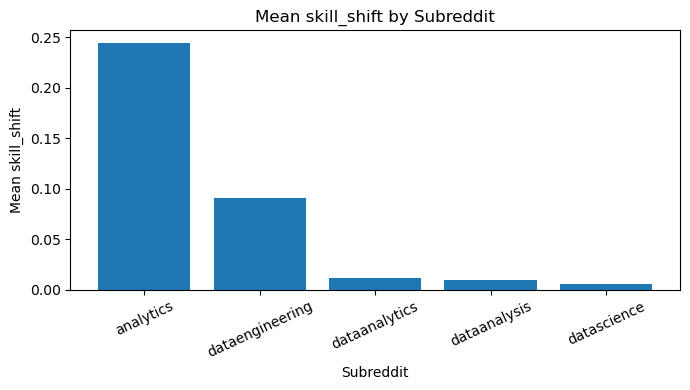

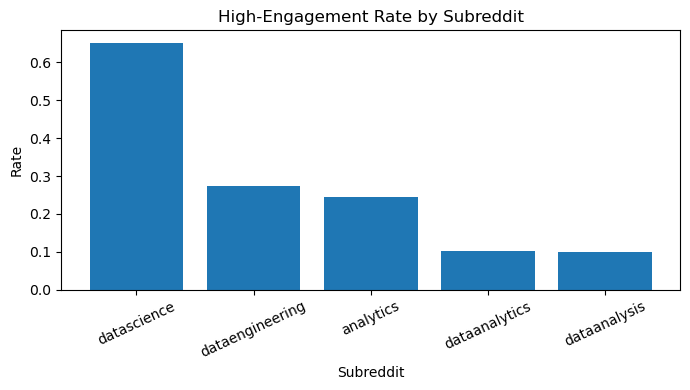

In [153]:
import matplotlib.pyplot as plt

# Build subgroup summaries directly from analysis_df for plotting
sub_shift_plot = analysis_df.groupby("subreddit", as_index=False)["skill_shift"].mean().sort_values("skill_shift", ascending=False)
sub_eng_plot = analysis_df.groupby("subreddit", as_index=False)["high_engagement"].mean().sort_values("high_engagement", ascending=False)

plt.figure(figsize=(7, 4))
plt.bar(sub_shift_plot["subreddit"], sub_shift_plot["skill_shift"])
plt.title("Mean skill_shift by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Mean skill_shift")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.bar(sub_eng_plot["subreddit"], sub_eng_plot["high_engagement"])
plt.title("High-Engagement Rate by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Rate")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


## Feature Ablation Study

Goal: To see the uplift of each features

Post-time ablation sets:
- `lexicon_only`
- `topic_only`
- `subreddit_and_length`
- `full_posttime_features`
- `tfidf_text_baseline`


In [154]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

if "idx_train_post" not in globals() or "idx_test_post" not in globals():
    raise RuntimeError("Run leakage-safe engagement cell first.")

lexicon_num = ["hard_post_score","soft_post_score","post_skill_balance","hard_seed_hits_post","soft_seed_hits_post"]
topic_cols = [c for c in analysis_df.columns if c.startswith("topic_prob_")]
meta_num = ["post_len_tokens"]
meta_cat = ["subreddit"]

feature_sets = {
    "lexicon_only": (lexicon_num, []),
    "topic_only": (topic_cols, []),
    "subreddit_and_length": (meta_num, meta_cat),
    "full_posttime_features": (lexicon_num + topic_cols + meta_num, meta_cat),
}

rows=[]
for name,(num_cols,cat_cols) in feature_sets.items():
    X = analysis_df.loc[:, num_cols + cat_cols]
    y = analysis_df["high_engagement"]
    X_train = X.loc[idx_train_post]
    X_test = X.loc[idx_test_post]
    y_train = y.loc[idx_train_post]
    y_test = y.loc[idx_test_post]

    trans=[]
    if num_cols:
        trans.append(("num", Pipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num_cols))
    if cat_cols:
        trans.append(("cat", Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols))

    pre = ColumnTransformer(trans)
    model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, class_weight="balanced", random_state=42)
    pipe = Pipeline([("preprocess", pre), ("model", model)])
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    prob = pipe.predict_proba(X_test)[:,1]
    rows.append({"feature_set":name,"f1":f1_score(y_test,pred),"precision":precision_score(y_test,pred),"recall":recall_score(y_test,pred),"roc_auc":roc_auc_score(y_test,prob)})

X_train_text = analysis_df.loc[idx_train_post, "post_text"].fillna("")
X_test_text = analysis_df.loc[idx_test_post, "post_text"].fillna("")
y_train = analysis_df.loc[idx_train_post, "high_engagement"]
y_test = analysis_df.loc[idx_test_post, "high_engagement"]

tfidf_baseline = Pipeline([("tfidf", TfidfVectorizer(stop_words="english", min_df=5, ngram_range=(1,2))), ("model", LogisticRegression(max_iter=1000, class_weight="balanced", C=1.0))])
tfidf_baseline.fit(X_train_text, y_train)
pred_t = tfidf_baseline.predict(X_test_text)
prob_t = tfidf_baseline.predict_proba(X_test_text)[:,1]
rows.append({"feature_set":"tfidf_text_baseline","f1":f1_score(y_test,pred_t),"precision":precision_score(y_test,pred_t),"recall":recall_score(y_test,pred_t),"roc_auc":roc_auc_score(y_test,prob_t)})

ablation_results = pd.DataFrame(rows).sort_values(["f1","roc_auc"], ascending=False)
print("Ablation results (post-time setup; higher is better):")
print(ablation_results.to_string(index=False, float_format=lambda x: f"{x:.4f}"))


Ablation results (post-time setup; higher is better):
           feature_set     f1  precision  recall  roc_auc
full_posttime_features 0.4493     0.4769  0.4247   0.7103
   tfidf_text_baseline 0.4277     0.3953  0.4658   0.6838
  subreddit_and_length 0.3953     0.3434  0.4658   0.5648
            topic_only 0.3000     0.3134  0.2877   0.6023
          lexicon_only 0.2645     0.3333  0.2192   0.5624


## Visualization: Ablation Results


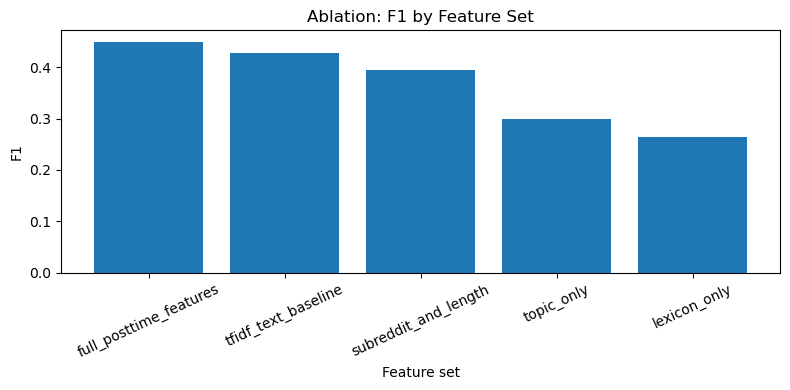

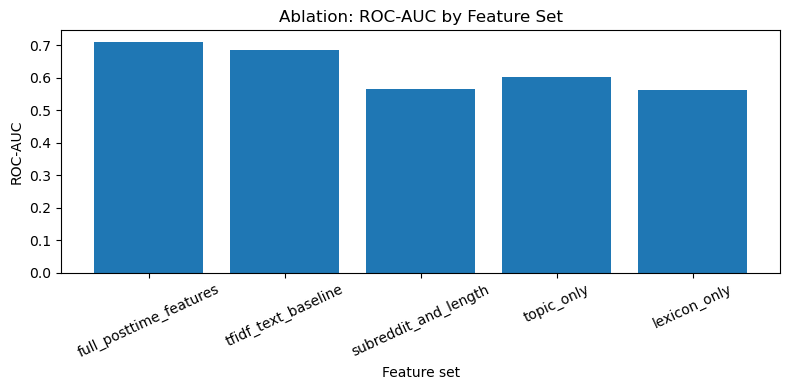

In [155]:
import matplotlib.pyplot as plt

if "ablation_results" not in globals():
    raise RuntimeError("Run ablation cell first.")

ab = ablation_results.sort_values("f1", ascending=False)

plt.figure(figsize=(8, 4))
plt.bar(ab["feature_set"], ab["f1"])
plt.title("Ablation: F1 by Feature Set")
plt.xlabel("Feature set")
plt.ylabel("F1")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(ab["feature_set"], ab["roc_auc"])
plt.title("Ablation: ROC-AUC by Feature Set")
plt.xlabel("Feature set")
plt.ylabel("ROC-AUC")
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()


## Error Analysis (Model Diagnostics)

This section reports held-out false positives and false negatives for the selected post-time model.
It includes ranked examples and short text snippets for qualitative inspection.


In [156]:
import pandas as pd

if "post_model_artifacts" not in globals():
    raise RuntimeError("Run leakage-safe engagement cell first.")

best_model_post_name = post_model_artifacts["best_model_name"]
idx_test = post_model_artifacts["idx_test"]
y_test = post_model_artifacts["y_test"]
pred = post_model_artifacts["y_pred"]
prob = post_model_artifacts["y_prob"]

err_df = analysis_df.loc[idx_test, ["post_id", "subreddit", "title", "num_comments", "post_text"]].copy()
err_df["y_true"] = y_test.values
err_df["y_pred"] = pred
err_df["pred_prob_high_engagement"] = prob

fp = err_df[(err_df["y_true"] == 0) & (err_df["y_pred"] == 1)].copy()
fn = err_df[(err_df["y_true"] == 1) & (err_df["y_pred"] == 0)].copy()

print(f"Model used for diagnostics: {best_model_post_name}")
print(f"False positives: {len(fp)}")
print(f"False negatives: {len(fn)}")

print("\nTop 5 false positives (highest predicted probability):")
show_fp = fp.sort_values("pred_prob_high_engagement", ascending=False).head(5)
print(show_fp[["post_id", "subreddit", "num_comments", "pred_prob_high_engagement", "title"]].to_string(index=False))

print("\nTop 5 false negatives (lowest predicted probability):")
show_fn = fn.sort_values("pred_prob_high_engagement", ascending=True).head(5)
print(show_fn[["post_id", "subreddit", "num_comments", "pred_prob_high_engagement", "title"]].to_string(index=False))

print("\nBrief text snippets for diagnostic reading:")
for label, subdf in [("FP", show_fp), ("FN", show_fn)]:
    print(f"\n{label} examples:")
    for _, r in subdf.iterrows():
        snippet = (r["post_text"] or "").replace("\n", " ")[:220]
        print(f"- {r['post_id']} | {r['subreddit']} | comments={r['num_comments']} | p={r['pred_prob_high_engagement']:.3f}")
        print(f"  title: {r['title']}")
        print(f"  text: {snippet}...")


Model used for diagnostics: structured_logreg
False positives: 71
False negatives: 23

Top 5 false positives (highest predicted probability):
post_id       subreddit  num_comments  pred_prob_high_engagement                                                                                                         title
1qsls5g     datascience            10                   0.882045 Am I drifting away from Data Science, or building useful foundations? (2 YOE working in a startup, no coding)
1qc6mv2     datascience            10                   0.867862                                             Undergrad Data Science dissertation ideas [Quantitative Research]
1qejnn6 dataengineering             7                   0.853458                                                         Messy Data Problems: How to get Stakeholders on Board
1qh0m1y     datascience             9                   0.775613                                                Which role better prepares you for AI/ML and a

# Final Project Report
## Reddit Career Discourse in Data Analytics: Skill Focus, Topic Structure, and Engagement Patterns

### 1. Background and Project Objective
This project studies how data-career discussions are framed in Reddit communities and how those discussions evolve after community responses. The motivation is practical: students and early-career professionals often face unclear expectations about what skills matter most, how roles differ in practice, and how to interpret market signals from peer discussions.

The project was designed around one central analytical target: measuring whether comment language shifts relative to post language from a hard-skill orientation to a more advice-oriented or soft-skill orientation. In parallel, the project also evaluates whether engagement can be predicted from post-time information, so that interpretation is not only descriptive but also behaviorally informative.

### 2. Data and Unit of Analysis
The dataset contains 1,144 posts and 4,769 comments collected from five communities: `analytics`, `dataengineering`, `dataanalytics`, `dataanalysis`, and `datascience`. The post is the analysis unit. For each post, top comments were aggregated and paired back to the post-level record.

This design supports direct comparison between what the original poster emphasizes and what the community emphasizes in response. It also ensures that engagement variables are aligned at the same post-level unit when building predictive models.

Data quality checks indicate stable coverage. Missing subreddit rate is 0.0. Empty post token rate is 0.0. Empty comment token rate is approximately 0.093. These checks indicate that preprocessing can proceed without major structural gaps.

### 3. Processing Pipeline and Feature Design
Text was processed using a standard NLP sequence from class: lowercasing, regex cleaning, stopword removal, POS filtering (`NN`, `JJ`, `VB`), lemmatization, and unigram/bigram tokenization. The objective of this pipeline is to preserve informative lexical signal while removing common noise.

The semantic scoring layer uses weighted lexicons. Hard-skill and soft-skill seed vocabularies were created and weighted using PMI. This gives each term a contextual association weight rather than relying only on frequency. The resulting document-level features are:
- hard and soft scores for post text
- hard and soft scores for comment text
- post and comment skill balances (`soft - hard`)
- the core shift metric `skill_shift = comment_skill_balance - post_skill_balance`

A positive `skill_shift` indicates that responses become relatively more soft-skill/advice oriented than the original posts.

### 4. Main Language-Shift Findings
The primary outcome summary is based on 1,144 observations. Mean `skill_shift` is 0.1064, median `skill_shift` is 0.0000, and 41.0% of threads show positive shift.

Interpretively, this indicates a modest directional pattern rather than a large transformation. The average is positive, so responses tend to move toward advice orientation. However, the median at zero implies many threads do not shift strongly. The best interpretation is that community responses often add advisory framing, but the baseline technical framing remains substantial.

This result aligns with the observed post/comment balance structure: posts are generally more hard-skill weighted, while comments are somewhat less hard-skill concentrated.

### 5. Word Association Structure (Lift and Confidence)
To complement the shift metric, association analysis was run on selected term pairs using lift and confidence. This was used to examine whether key terms are co-mentioned more than expected by chance.

Examples from the output include:
- `python` with `sql` (lift 3.1101)
- `sql` with `excel` (lift 2.9960)
- `communication` with `stakeholder` (high lift on low support)

These patterns indicate that technical terms form stable co-occurrence clusters in this corpus. Some soft-skill pair associations are present but less frequent, which is consistent with the broader observation that advisory framing exists but is not dominant in every thread.

### 6. Topic Modeling and Theme-Level Behavior
LDA model selection produced a 4-topic solution (perplexity 594.56). Topic-level summaries show clear variation in mean `skill_shift` across themes:
- Topic 0: 0.4990
- Topic 3: 0.0270
- Topic 1: 0.0190
- Topic 2: -0.0025

This indicates that language shift is context-dependent. Some discussion themes prompt stronger advisory responses, while others remain primarily technical.

Topic labels used in this report are based on the top words from the fitted LDA model:
- Topic 0: Platform/Data Pipeline and Implementation Discussion (`run`, `http`, `github`, `pipeline`, `python`)
- Topic 1: Team/BI Workflow and Tooling Discussion (`team`, `tool`, `sql`, `bi`, `design`)
- Topic 2: Project Build and Analysis Workflow Discussion (`project`, `file`, `table`, `analysis`, `model`)
- Topic 3: Career Path and Job-Market Discussion (`job`, `analytics`, `role`, `analyst`, `company`)

Representative high-probability posts were included in the notebook to make these labels transparent and verifiable.

### 7. Engagement Modeling: Design and Performance
High engagement was defined as `num_comments` at or above the 75th percentile (threshold = 13). The target is imbalanced, with approximately 74.5% low and 25.5% high engagement.

To avoid leakage, models were trained using post-time features only. Three tuned candidates were compared:
- structured logistic regression
- structured random forest
- TF-IDF logistic baseline

In this run, structured logistic regression performed best on held-out F1:
- test F1: 0.5155
- ROC-AUC: 0.7337
- precision (positive class): 0.4132
- recall (positive class): 0.6849

These values indicate moderate predictive signal. The precision-recall profile shows higher recall than precision, meaning the model captures many high-engagement posts but at the cost of more false positives.

### 8. Ablation and Diagnostic Interpretation
Ablation was used to test feature-group contribution under the same post-time setup. Full post-time features performed best in the ablation table, while topic-only and lexicon-only subsets were weaker. The TF-IDF baseline remained competitive but did not surpass the best combined setup.

This pattern indicates feature complementarity: lexical balance, topic structure, and context features each carry partial signal, and performance improves when they are combined.

Error analysis further validates the model behavior. The selected model produced 71 false positives and 23 false negatives. Reviewing these examples with titles and snippets shows where language appears engagement-like but does not cross threshold, and where high-engagement posts contain cues not fully captured by current features.

### 9. Subreddit-Level Context
Subreddit-level summaries show that discourse behavior is not uniform across communities. Mean `skill_shift` is highest in `analytics`, while high-engagement rate is highest in `datascience`.

A chi-square test on subreddit by engagement contingency confirms significant distribution differences:
- `chi2 = 87.0771`
- `dof = 4`
- `p = 5.49772e-18`

This reinforces that community context is a major explanatory factor for engagement outcomes and should be considered when interpreting global averages.

### 10. Integrated Conclusion
The project delivers a complete and interpretable text-analytics workflow tied to a real labor-market communication problem. Results support a consistent core conclusion: response language tends to shift modestly toward advice-oriented framing, but the magnitude of that shift varies by theme and subreddit context.

The predictive component shows that engagement can be modeled from post-time features at moderate quality, and the ablation/error analyses clarify both strengths and limitations of the model. Overall, the notebook provides coherent evidence from descriptive analysis, thematic modeling, association structure, and supervised evaluation in one integrated pipeline.

### 11. Limitations and Future Extensions
This analysis has several limitations. First, the hard-skill and soft-skill seed lexicons are manually specified, so coverage depends on vocabulary choices and may miss emerging terms. Second, topic labels are interpretation-based and depend on top-word summaries, which can simplify nuanced themes. Third, engagement is modeled using observable text/context features only; unobserved factors such as posting time granularity, external events, and user-level network effects are not included.

Future extensions can improve both explanatory depth and predictive quality. The first extension is richer feature engineering, including temporal features and uncertainty/emotion indicators. The second is robust validation across time slices or subreddit-held-out splits to test generalization stability. The third is expanding the lexicon framework with semi-automated seed expansion, while preserving interpretability. Together, these extensions would strengthen both the analytical reliability and practical applicability of the project.
